## WCOA 2013 cruise data analysis

To download the data used in this tutorial, use the following command in the Terminal (Mac) or Git Bash (Windows).

```bash
git clone https://github.com/mlmldata2020/week01_wcoa_cruise.git
```

In this part of the tutorial, we will go over the basics of working with dates in Pandas and Numpy, make some exploratory plots and start a regression analysis. The data exploration will be largely guided by student interest.

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Introduction to Pandas dataframes

We use Pandas to import the csv data file. 

Here, there is an optional `parse_dates` argument. The numbers in double brackets `[[8,9]]` indicate which columns to interpret as dates.

In [2]:
filename = 'data/week01_wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

In [3]:
df.head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2370.2,2,2369.0,2,7.294,2,25.0,NaN,9,NaN
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,NaN,9,NaN,9,7.295,2,25.0,NaN,9,NaN
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2349.6,2,2343.7,2,7.282,2,25.0,43.521,3,NaN
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2318.7,2,2311.9,2,7.287,2,25.0,45.641,2,NaN
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2300.0,2,2299.7,2,7.308,2,25.0,47.741,2,NaN


In [32]:
df.columns

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA'],
      dtype='object')

Instead of strings, the dates are now in a special `datetime64` format. This means that, instead of treating the dates in the same way as any other collection of characters, pandas and NumPy can understand how this variable represents time.

In [4]:
df['DATE_TIME'].head()

0   2013-08-05 02:12:20
1   2013-08-05 02:12:53
2   2013-08-05 02:19:58
3   2013-08-05 02:27:01
4   2013-08-05 02:30:53
Name: DATE_TIME, dtype: datetime64[ns]

For example, subtracting `datetime64` objects with pandas gives a `Timedelta` object, which is specifically used to represent differences between times. The first two samples in the cruise data are separated by 33 seconds (the time between firing of bottles).

In [5]:
df['DATE_TIME'][1]-df['DATE_TIME'][0]

Timedelta('0 days 00:00:33')

In [38]:
pd.unique(df['LATITUDE'])

array([48.2 , 48.3 , 48.37, 48.44, 48.5 , 48.53, 48.61, 48.66, 48.71,
       48.78, 48.81, 48.84, 47.97, 48.14, 47.96, 47.68, 47.13, 47.11,
       47.12, 47.34, 46.13, 46.17, 46.19, 46.25, 46.24, 46.12, 44.65,
       44.66, 44.2 , 41.99, 41.97, 41.96, 41.94, 41.9 , 40.25, 40.23,
       40.22, 40.21, 40.1 , 37.67, 37.94, 37.91, 37.87, 37.76, 37.75,
       36.8 , 36.78, 36.76, 36.73, 36.71, 36.69, 36.52, 36.7 ])

#### Exercise

Create a list of unique station ID’s (“STNNBR”) found in the survey data. Call it `stns`. How many unique stations are there in the data? 




### Summary statistics

A summary of the dataframe is given by the `.describe()` method.

In [44]:
df['CTDTMP'].describe()

count    969.000000
mean       8.993954
std        3.055917
min        1.738200
25%        7.292000
50%        8.328200
75%       10.752200
max       20.747400
Name: CTDTMP, dtype: float64

These summary statistics can also be accessed individually with similar syntax.

In [47]:
df['CTDTMP'].mean()

8.993954179566572

In [46]:
df['CTDTMP'].min()

1.7382

Alternate method using Numpy functions.

In [89]:
np.min(df['CTDTMP'])

1.7382

### Mathematical operations

Converting Celcius to Fahrenheit

In [78]:
df['CTDTMP_F'] = 9/5*df['CTDTMP'] + 32 

In [84]:
df['CTDTMP_F'].head()

0    38.63894
1    38.64236
2    39.85916
3    41.05328
4    41.82404
Name: CTDTMP_F, dtype: float64

In [87]:
df['CTDTMP'].head()

0    3.6883
1    3.6902
2    4.3662
3    5.0296
4    5.4578
Name: CTDTMP, dtype: float64

### Plotting

Plot latitude as a function of time.

(array([735084., 735087., 735090., 735093., 735096., 735099., 735102.,
        735105., 735108.]), <a list of 9 Text xticklabel objects>)

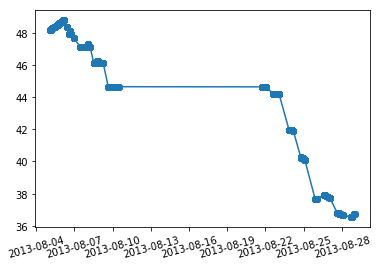

In [7]:
plt.figure()
plt.plot(df['DATE_TIME'],df['LATITUDE'],'-o')
plt.xticks(rotation=15)

The `pyplot` library automatically understands `datetime64` objects so it is easy to see how the ship moved between stations from north to south as weeks passed.

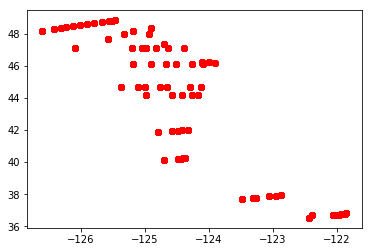

In [8]:
plt.figure()
plt.plot(df['LONGITUDE'], df['LATITUDE'], 'ro')

The `scatter()` function allows points to be colored according to the value of a variable. In the case of dates, later dates are shown as warmer colors.

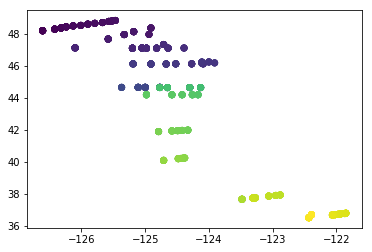

In [9]:
plt.figure()
plt.scatter(df['LONGITUDE'],df['LATITUDE'],c=df['DATE_TIME'])

Note that the vertical coordinate is pressure (not depth, which indicates the bottom depth rather than the depth of the sample). To plot dissolved oxygen with depth:

Text(0,0.5,'pressure[dbar]')

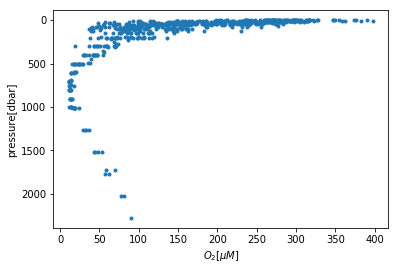

In [10]:
plt.figure()
plt.plot(df['OXYGEN'],df['CTDPRS'],'.')
plt.gca().invert_yaxis()

plt.xlabel('$O_2 [\mu M]$')
plt.ylabel('pressure[dbar]')

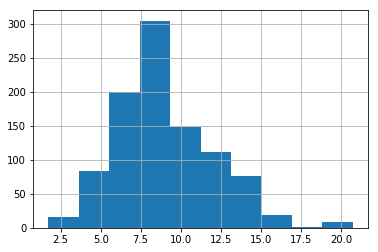

In [75]:
plt.figure()
df['CTDTMP'].hist()

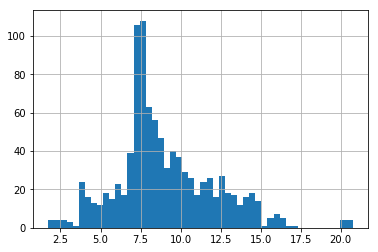

In [77]:
plt.figure()
df['CTDTMP'].hist(bins=50)

In [13]:
df.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA'],
      dtype='object')

#### Execrises

* What scientific questions can be addressed with this data set?
* What relationships might occur between different variables?
* What differences might occur within the same variables, but at different locations or times?
* Create exploratory plots